# Script permettant de visualiser la répartition du nombre d'erreur en fonction du primate
Input: fichier type [nb nom_primate]. Un nombre par primate
Output: graph matplotlib  

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
number_file = pd.read_csv("../raw/uniprot-error-mismatch/number_seq_by_primate.txt", sep="\t", header=None, names=["number", "primate"])
normalize_file = pd.read_csv("../raw/uniprot-error-mismatch/number_seq_by_primate_all.txt", sep="\t", header=None, names=["number", "primate"])
number_file = number_file.merge(normalize_file, on="primate", how="inner")
number_file["Errror_per_seq"] = number_file[["number_x"]].div(number_file["number_y"], axis=0)

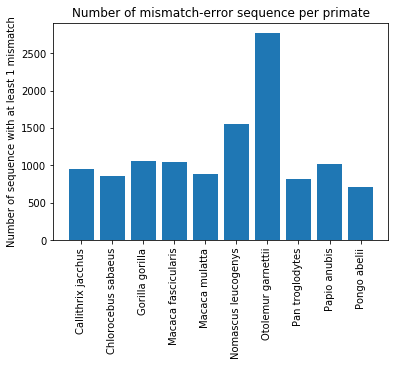

In [43]:
index = number_file["primate"].to_list()
value = number_file["number_x"].to_list()
plt.bar(index, value)
plt.title("Number of mismatch-error sequence per primate")
plt.ylabel("Number of sequence with at least 1 mismatch")
plt.xticks(rotation=90)
plt.savefig("../results/figures/mistmatch-error-per-primate.png", dpi=300, bbox_inches='tight')
plt.show()

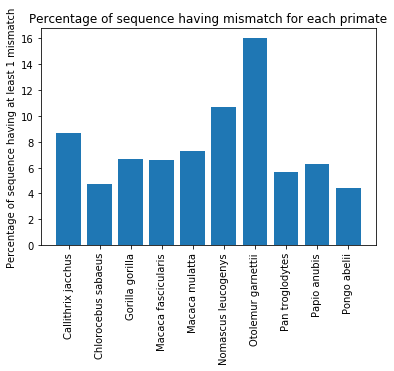

In [44]:
index = number_file["primate"].to_list()
value = number_file["Errror_per_seq"].to_list()
value = [x*100 for x in value]
plt.bar(index, value)
plt.title("Percentage of sequence having mismatch for each primate")
plt.ylabel("Percentage of sequence having at least 1 mismatch")
plt.xticks(rotation=90)
plt.savefig("../results/figures/percenage-mistmatch-error-per-primate.png", dpi=300, bbox_inches='tight')
plt.show()